In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits_dataset = tf.keras.datasets.mnist

In [3]:
(training_images,training_labels), (testing_images,testing_labels) = digits_dataset.load_data()

In [4]:
label_names = [str(i) for i in range(1,9)]
print(label_names)

['1', '2', '3', '4', '5', '6', '7', '8']


In [5]:
training_images.shape

(60000, 28, 28)

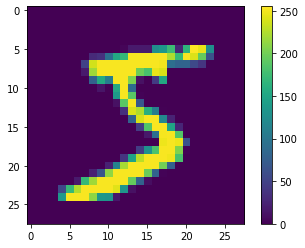

In [6]:
plt.imshow(training_images[0])
plt.colorbar()

In [7]:
training_images = training_images / 255.0
testing_images = testing_images / 255.0

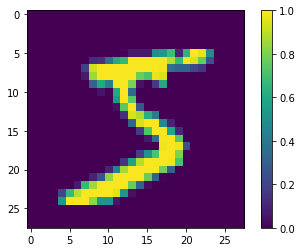

In [8]:
plt.imshow(training_images[0])
plt.colorbar()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

In [10]:
model.compile(optimizer='nadam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
model.fit(training_images,training_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 276us/sample - loss: 0.2614 - accuracy: 0.9252
Epoch 2/5
60000/60000 [==============================] - 12s 203us/sample - loss: 0.1152 - accuracy: 0.9665
Epoch 3/5
60000/60000 [==============================] - 15s 244us/sample - loss: 0.0781 - accuracy: 0.9765
Epoch 4/5
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0587 - accuracy: 0.9822
Epoch 5/5
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0444 - accuracy: 0.9868


In [12]:
test_loss, test_acc = model.evaluate(testing_images, testing_labels, verbose=2)

10000/1 - 2s - loss: 0.0332 - accuracy: 0.9792


### Accuracy by Optimizer
(Using sparse_categorical_crossentropy)

|  | Adadelta | Adagrad | Adam | Adamax | Ftrl | Nadam | RMSprop | SGD |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| accuracy | .661 | .912 | .986 | .713 | .987 | .982 | .975 | .927 |